## Imports

In [1]:

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from dataget import data # <== dataget

%matplotlib inline

## Obtener Dataset
Utilizando la funcion `data` de `dataget` llamamos el dataset `mit-face-rec` y ejecutamos el metodo `get` por si acaso aun no tenemos los datos. Podriamos excluir el llamado a `.get()` si ya descargamos los datos desde la consola, sin embargo, `get` no descargara los datos si ya existen por lo tanto no hace daño tenerlo.

In [2]:
dataset = data("mit-face-rec").get()

===DOWNLOAD===
downloading chromedriver.zip
chromedriver.zip 0%
chromedriver.zip 5%
chromedriver.zip 10%
chromedriver.zip 15%
chromedriver.zip 20%
chromedriver.zip 25%
chromedriver.zip 30%
chromedriver.zip 35%
chromedriver.zip 40%
chromedriver.zip 45%
chromedriver.zip 50%
chromedriver.zip 55%
chromedriver.zip 60%
chromedriver.zip 65%
chromedriver.zip 70%
chromedriver.zip 75%
chromedriver.zip 80%
chromedriver.zip 85%
chromedriver.zip 90%
chromedriver.zip 95%
chromedriver.zip 100%
 (... it may open a chrome window, please dont close it ...)
0%
5%
10%
15%
20%
25%
30%
35%
40%
45%
50%
55%
60%
65%
70%
75%
80%
85%
90%
95%
100%
DONE

===EXTRACT===
Extracting zip

===RM-COMPRESSED===
removing compressed files

===PROCESS===
Image dims: (128, 128), Image format: jpg
formating test-set 0
formating test-set 1
formating test-set 2
formating test-set 3
formating test-set 4
formating test-set 5
formating test-set 6
formating test-set 7
formating test-set 8
formating test-set 9
formating training-set 

### Random Batch DataFrame
Para fines de visualizacion, a continuacion vamos a obtener un dataframe de 10 filas con imagenes aleatorias del `training_set` utilizando el metodo `random_batch_dataframe_generator`, este nos devuelve un generador "infinito" por lo cual utilizamos la funcion `next` para obtener solo el primer dataframe.

In [3]:
# obtener todas la imagenes (lento)
# df = dataset.training_set.dataframe()

# obtener 10 imagenes aleatorias (rapido)
df = next(dataset.training_set.random_batch_dataframe_generator(10))


df

10


,class_id,filename,image
85,0,C:\Users\elmon\Desktop\work\colomb-ia\supervis...,"[[255, 255, 0, 255, 0, 0, 98, 101, 114, 109, 1..."
1729,9,C:\Users\elmon\Desktop\work\colomb-ia\supervis...,"[[255, 255, 0, 255, 0, 9, 101, 109, 105, 108, ..."
262,1,C:\Users\elmon\Desktop\work\colomb-ia\supervis...,"[[104, 104, 9, 99, 45, 45, 45, 105, 166, 190, ..."
1275,7,C:\Users\elmon\Desktop\work\colomb-ia\supervis...,"[[255, 254, 0, 255, 255, 0, 7, 7, 98, 114, 114..."
1301,7,C:\Users\elmon\Desktop\work\colomb-ia\supervis...,"[[254, 255, 0, 255, 255, 0, 7, 7, 98, 113, 114..."
7,0,C:\Users\elmon\Desktop\work\colomb-ia\supervis...,"[[255, 255, 1, 255, 0, 0, 98, 101, 114, 110, 1..."
442,2,C:\Users\elmon\Desktop\work\colomb-ia\supervis...,"[[104, 104, 9, 9, 107, 102, 102, 59, 227, 227,..."
551,3,C:\Users\elmon\Desktop\work\colomb-ia\supervis...,"[[105, 104, 12, 105, 13, 13, 21, 23, 26, 28, 2..."
339,1,C:\Users\elmon\Desktop\work\colomb-ia\supervis...,"[[104, 104, 9, 99, 130, 130, 132, 109, 23, 18,..."
610,3,C:\Users\elmon\Desktop\work\colomb-ia\supervis...,"[[104, 104, 12, 105, 21, 21, 31, 33, 35, 34, 3..."


Como vemos, el dataframe tiene los atributos `filename` que nos indica el nombre del archivo, `class_id` es la clase a la que corresponde la imagen, e `images` el cual contiene la informacion de la imagen representada como arreglos de numpy.

### Visualizacion de las muestras
Para visualizar las muestras iteramos sobre el dataframe y utilizamos la funcion `imshow` de `matplotlib.pyplot` el cual importamos como `plt`.

class: 0, shape: (128, 128)


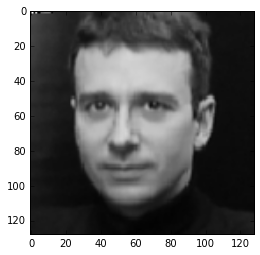

class: 9, shape: (128, 128)


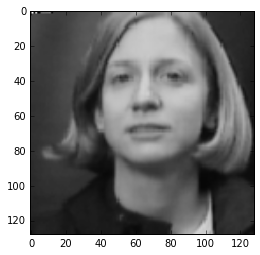

class: 1, shape: (128, 128)


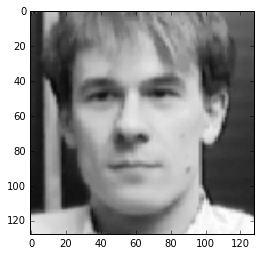

class: 7, shape: (128, 128)


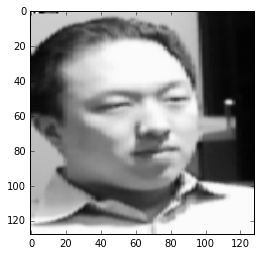

class: 7, shape: (128, 128)


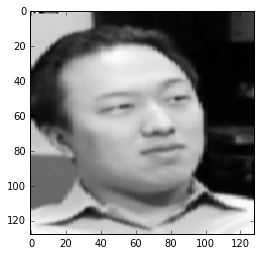

class: 0, shape: (128, 128)


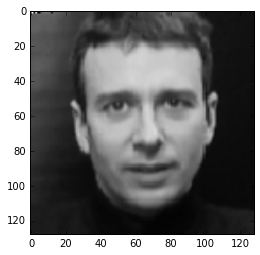

class: 2, shape: (128, 128)


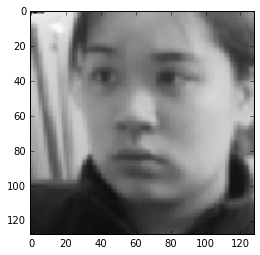

class: 3, shape: (128, 128)


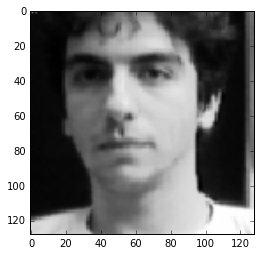

class: 1, shape: (128, 128)


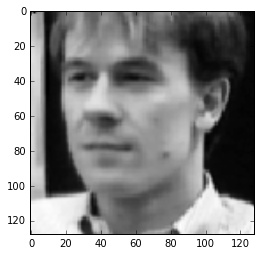

class: 3, shape: (128, 128)


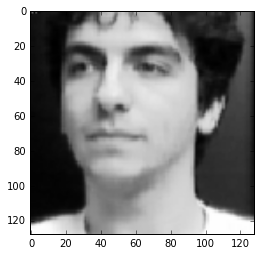

In [4]:
for i, row in df.iterrows():
    img = row.image
    print("class: {}, shape: {}".format(row.class_id, img.shape))
    plt.imshow(img, cmap='gray')
    plt.show()

### Numpy Arrays
Para trabajar librerías de Machine Learning usualmente es mas fácil obtener los datos como arreglos de numpy, para esto utilizamos los metodos `arrays` o `random_batch_arrays_generator` los cuales nos devuelven una tupla o un generador de tuplas, cada tupla contiene un arreglo `features` con las imagenes y un arreglo `labels` con las clases.

In [10]:
# obtener todas las imagenes (lento)
featuresTrain, labelsTrain = dataset.training_set.arrays()
featuresTest, labelsTest = dataset.test_set.arrays()    



print(featuresTrain.shape, labelsTrain.shape, featuresTest.shape, labelsTest.shape)

(1800, 128, 128) (1800,) (200, 128, 128) (200,)


## Solución planteada usando una RNN con unidades LSTM

In [11]:
print(np.unique(labelsTest))

[0 1 2 3 4 5 6 7 8 9]


In [12]:
from keras.layers import LSTM, Dense, Dropout
from keras.utils import np_utils
from keras.models import Sequential

n_classes=len(np.unique(labelsTrain))

labelsTest2 = np_utils.to_categorical(labelsTest, n_classes)
labelsTrain2 = np_utils.to_categorical(labelsTrain, n_classes)



Using TensorFlow backend.


### Normalización de las imagenes

In [13]:
avg_image=np.mean(featuresTrain,0)
std_image=np.std(featuresTrain,0)

featuresTrain=(featuresTrain-avg_image)/std_image
featuresTest=(featuresTest-avg_image)/std_image

### Creación del modelo

In [24]:
from keras.optimizers import RMSprop

HIDDEN_UNITS=64
input_shape = (featuresTrain.shape[1], featuresTrain.shape[2])



model = Sequential()
model.add(LSTM(HIDDEN_UNITS, input_shape=input_shape, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(n_classes, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,058.0
Trainable params: 50,058
Non-trainable params: 0.0
_________________________________________________________________


### Entrenamiento del modelo

In [25]:
NUM_EPOCHS=100
BATCH_SIZE=64
%time history = model.fit(featuresTrain, labelsTrain2, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, shuffle=True, verbose=1)

Epoch 1/100
1800/1800 [==============================] - 10s - loss: 1.6713 - acc: 0.4056    
Epoch 2/100
1800/1800 [==============================] - 8s - loss: 1.2219 - acc: 0.6433     
Epoch 3/100
1800/1800 [==============================] - 11s - loss: 0.9684 - acc: 0.7200    
Epoch 4/100
1800/1800 [==============================] - 10s - loss: 0.8006 - acc: 0.7744    
Epoch 5/100
1800/1800 [==============================] - 9s - loss: 0.6773 - acc: 0.8067     
Epoch 6/100
1800/1800 [==============================] - 8s - loss: 0.5737 - acc: 0.8356     
Epoch 7/100
1800/1800 [==============================] - 9s - loss: 0.5009 - acc: 0.8489     
Epoch 8/100
1800/1800 [==============================] - 9s - loss: 0.4280 - acc: 0.8733     
Epoch 9/100
1800/1800 [==============================] - 9s - loss: 0.3764 - acc: 0.8917     
Epoch 10/100
1800/1800 [==============================] - 9s - loss: 0.3213 - acc: 0.9144     
Epoch 11/100
1800/1800 [==============================] - 9

### Evalución del resultado obtenido

(200, 10)
accuracy en conjunto de test= 100.0
Normalized confusion matrix
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


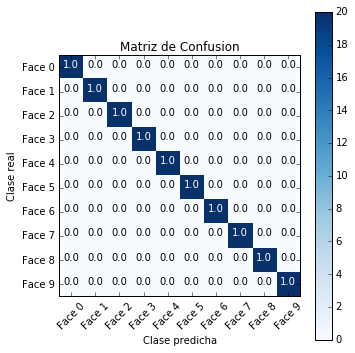

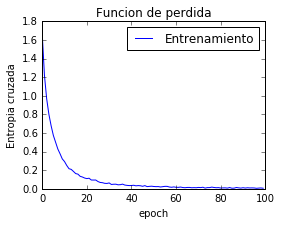

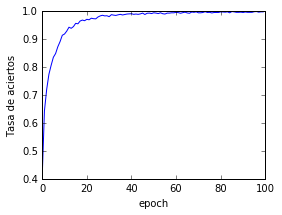

In [27]:
from sklearn.metrics import confusion_matrix
import itertools

def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])




def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Clase real')
    plt.xlabel('Clase predicha')


    

label_pred = model.predict(featuresTest)
print (label_pred.shape)


accTest=accuracy(label_pred, labelsTest2)

print('accuracy en conjunto de test=', accTest)

# grafica de la matriz de confusion

cnf_matrix = confusion_matrix(np.argmax(label_pred,1), np.argmax(labelsTest2,1))
np.set_printoptions(precision=2)

class_names=['Face '+str(j) for j in range(n_classes)]
# Plot non-normalized confusion matrix
plt.figure(figsize=(5,5))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de Confusion')

plt.savefig('cmLSTM.png')
plt.show()


# summarize history for loss
plt.figure(figsize=(4,3))
plt.plot(history.history['loss'])
plt.title('Funcion de perdida')
plt.ylabel('Entropia cruzada')
plt.xlabel('epoch')
plt.legend(['Entrenamiento'])
plt.savefig('lossLSTM.png')
plt.show()

plt.figure(figsize=(4,3))
plt.plot(history.history['acc'])
plt.ylabel('Tasa de aciertos')
plt.xlabel('epoch')
plt.savefig('accTrainLSTM.png')
plt.show()